## Import Packages

In [1]:
import pandas as pd
import numpy as np
import requests
import bs4
import io
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.options.display.max_columns = 999

## Import Data

In [2]:
url = "https://raw.githubusercontent.com/chris-taylor/USElection/master/data/electoral-college-votes.csv"
res = requests.get(url).content
electoral = pd.read_csv(io.StringIO(res.decode('utf-8')), header = None, names = ["state", "elec_votes"])

In [3]:
polls = pd.read_csv("../datasets/president_polls.csv")

In [4]:
# Collect relevant polling columns
cols = ["question_id",
        "poll_id",
        "stage",
        "office_type",
        "pollster",
        "state",
        "end_date",
        "candidate_name",
        "candidate_party",
        "sample_size",
        "pct"]


short_polls = polls[cols]

In [5]:
# Create Pollster Ratings DataFrame from 538
url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/pollster-ratings/pollster-ratings.csv"
res = requests.get(url).content
pollster_rating = pd.read_csv(io.StringIO(res.decode('utf-8')))

## Data Overiew

In [6]:
# Electoral Votes
electoral.head()

state  elec_votes
0     Alabama           9
1      Alaska           3
2     Arizona          11
3    Arkansas           6
4  California          55

In [7]:
# Polling data
polls.head()

question_id  poll_id  cycle          state  pollster_id         pollster  \
0       113992    62978   2020  New Hampshire         1102  Emerson College   
1       113992    62978   2020  New Hampshire         1102  Emerson College   
2       113993    62978   2020  New Hampshire         1102  Emerson College   
3       113993    62978   2020  New Hampshire         1102  Emerson College   
4       113994    62978   2020  New Hampshire         1102  Emerson College   

  sponsor_ids sponsors     display_name  pollster_rating_id  \
0          43    7News  Emerson College                  88   
1          43    7News  Emerson College                  88   
2          43    7News  Emerson College                  88   
3          43    7News  Emerson College                  88   
4          43    7News  Emerson College                  88   

  pollster_rating_name fte_grade  sample_size population population_full  \
0      Emerson College        A-          547         rv              rv   
1      Emerson College        A-          547         rv              rv   
2      Emerson College        A-          547         rv              rv   
3      Emerson College        A-          547         rv              rv   
4      Emerson College        A-          547         rv              rv   

  methodology     office_type  seat_number  seat_name start_date  end_date  \
0  IVR/Online  U.S. President            0        NaN   11/22/19  11/26/19   
1  IVR/Online  U.S. President            0        NaN   11/22/19  11/26/19   
2  IVR/Online  U.S. President            0        NaN   11/22/19  11/26/19   
3  IVR/Online  U.S. President            0        NaN   11/22/19  11/26/19   
4  IVR/Online  U.S. President            0        NaN   11/22/19  11/26/19   

  election_date sponsor_candidate  internal partisan  tracking  \
0           NaN               NaN     False      NaN       NaN   
1           NaN               NaN     False      NaN       NaN   
2           NaN               NaN     False      NaN       NaN   
3           NaN               NaN     False      NaN       NaN   
4           NaN               NaN     False      NaN       NaN   

   nationwide_batch  ranked_choice_reallocated      created_at  \
0             False                      False  11/26/19 21:12   
1             False                      False  11/26/19 21:12   
2             False                      False  11/26/19 21:12   
3             False                      False  11/26/19 21:12   
4             False                      False  11/26/19 21:12   

                                   notes  \
0  split sample without undecided option   
1  split sample without undecided option   
2  split sample without undecided option   
3  split sample without undecided option   
4  split sample without undecided option   

                                                 url    stage   answer  \
0  http://emersonpolling.com/2019/11/27/new-hamps...  general    Biden   
1  http://emersonpolling.com/2019/11/27/new-hamps...  general    Trump   
2  http://emersonpolling.com/2019/11/27/new-hamps...  general  Sanders   
3  http://emersonpolling.com/2019/11/27/new-hamps...  general    Trump   
4  http://emersonpolling.com/2019/11/27/new-hamps...  general   Warren   

        candidate_name candidate_party   pct  
0  Joseph R. Biden Jr.             DEM  52.3  
1         Donald Trump             REP  47.7  
2      Bernard Sanders             DEM  51.6  
3         Donald Trump             REP  48.4  
4     Elizabeth Warren             DEM  48.8

In [8]:
# Pollster Ratings from 538
pollster_rating.head()

Pollster  Pollster Rating ID  # of Polls  \
0                Monmouth University                 215         100   
1                       Selzer & Co.                 304          44   
2           ABC News/Washington Post                   3          63   
3                     Elway Research                  87          21   
4  Field Research Corp. (Field Poll)                  94          25   

  NCPP / AAPOR / Roper Live Caller With Cellphones Methodology Banned by 538  \
0                  yes                         yes        Live            no   
1                  yes                         yes        Live            no   
2                  yes                         yes        Live            no   
3                  yes                         yes        Live            no   
4                  yes                         yes        Live            no   

   Historical Advanced Plus-Minus  Predictive    Plus-Minus 538 Grade  \
0                            -1.9                      -1.5        A+   
1                            -1.9                      -1.4        A+   
2                            -1.5                      -1.3        A+   
3                            -2.5                      -1.2      A/B°   
4                            -2.0                      -1.2      A/B°   

  Mean-Reverted Bias Races Called Correctly Misses Outside MOE  \
0             D +1.3                    80%                21%   
1             D +0.1                    84%                25%   
2             D +0.6                    79%                 5%   
3             D +0.5                    90%                 5%   
4             R +1.0                   100%                16%   

   Simple Average Error  Simple Expected Error  Simple Plus-Minus  \
0                   5.2                    6.5               -1.1   
1                   4.2                    5.7               -1.3   
2                   2.8                    4.6               -1.7   
3                   3.9                    6.3               -2.2   
4                   3.9                    5.5               -1.5   

   Advanced Plus-Minus  Mean-Reverted Advanced Plus Minus  \
0                 -1.9                               -1.6   
1                 -1.9                               -1.1   
2                 -1.5                               -1.1   
3                 -2.5                               -1.0   
4                 -2.0                               -0.8   

   Predictive Plus-Minus  # of Polls for Bias Analysis    Bias  \
0                   -1.5                            70  D +1.8   
1                   -1.4                            31  D +0.1   
2                   -1.3                            58  D +0.9   
3                   -1.2                            20  D +1.2   
4                   -1.2                            18  R +3.3   

  Mean-Reverted Bias.1 House Effect  \
0               D +1.3       R +0.5   
1               D +0.1       D +0.2   
2               D +0.6       D +1.5   
3               D +0.5       D +3.7   
4               R +1.0       D +0.6   

   Average Distance from Polling Average (ADPA)  Herding Penalty  
0                                           5.1             0.20  
1                                           5.0             0.00  
2                                           3.8             0.02  
3                                           4.5             0.37  
4                                           4.7             0.00

## Data Cleaning

In [9]:
# create function to do all combos
def get_matchup(df, pollster_rating, candidate_x, candidate_y, level = "national", state = None):
    """
    Takes in a Pandas DataFrame of polls from FiveThirtyEight
    and candidate names and returns a combined DataFrame of
    the Candidate-1 vs. Candidate-2 poll results.
    
    Parameters:
    -----------
    df : pandas dataframe, polls from FiveThirtyEight
    pollster_rating : pandas dataframe, pollster organization weights
    candidate_1 : str, Name of candidate
    candidate_2 : str, Name of candidate
    level : str, "national", "state", or "all" state level polls
    state : str, default None, if "state" level is specified, which state to return
    """
    
    # Get relevant columns from the DataFrame
    cols = ["question_id",
            "poll_id",
            "stage",
            "office_type",
            "pollster",
            "state",
            "end_date",
            "candidate_name",
            "candidate_party",
            "sample_size",
            "pct"]
    df = df[cols]
    
    
    # Combine polling data with pollster ratings
    cols = ["Pollster",
            "Predictive Plus-Minus",
            "538 Grade"]
    df = df.merge(pollster_rating[cols],
                         how = "left",
                         left_on = "pollster",
                         right_on = "Pollster")
    # Find and keep only polls with Pollster Ratings
    df = df.loc[df["pollster"] == df["Pollster"], ]
    
    
    
    # Get polls where there is no specified state (i.e. National Polls)
    if level == "national": 
        df = df.loc[df["state"].isna()]
    # Get polls for a specific state
    elif level == "state":
        df = df.loc[df["state"] == state]
    elif level == "all":
        df = df.loc[df["state"].notna()]
        
    # Create separate DataFrames for each candidate
    dict_of_candidate_dfs = {}
    for candidate in df['candidate_name'].unique():
        c_df = df.loc[df['candidate_name'] == candidate, :]
        dict_of_candidate_dfs[candidate] = c_df
    
    # Get each DataFrame for each candidate if they exist
    if candidate_x in df["candidate_name"].unique():
        cand_1 = dict_of_candidate_dfs[candidate_x]
    else:
        print("No polls have been collected for the specified race.")
        return
    
    if candidate_y in df["candidate_name"].unique():
        cand_2 = dict_of_candidate_dfs[candidate_y]
    else:
        print("No polls have been collected for the specified race.")
        return
    
    # Combine DataFrames
    pair = pd.merge(cand_1,
                    cand_2[["question_id", "candidate_name", "candidate_party", "pct"]],
                    on = "question_id").drop(["Pollster"], axis = 1)
    
    # Create column for votes for each candidate
    pair["votes_x"] = (pair["sample_size"] * (pair["pct_x"] / 100)).astype(int)
    pair["votes_y"] = (pair["sample_size"] * (pair["pct_y"] / 100)).astype(int)
    
    pair["total_decided"] = pair["votes_x"] + pair["votes_y"]
    
    # Convert End Date column to Datetime
    pair["end_date"] = pd.to_datetime(pair["end_date"])
    
    return pair

In [10]:
# Get National Polls for Donald Trump and Joseph R. Biden Jr.
biden_trump = get_matchup(polls, pollster_rating, "Donald Trump", "Joseph R. Biden Jr.")

/Users/grantwilson/anaconda3/envs/dsi/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


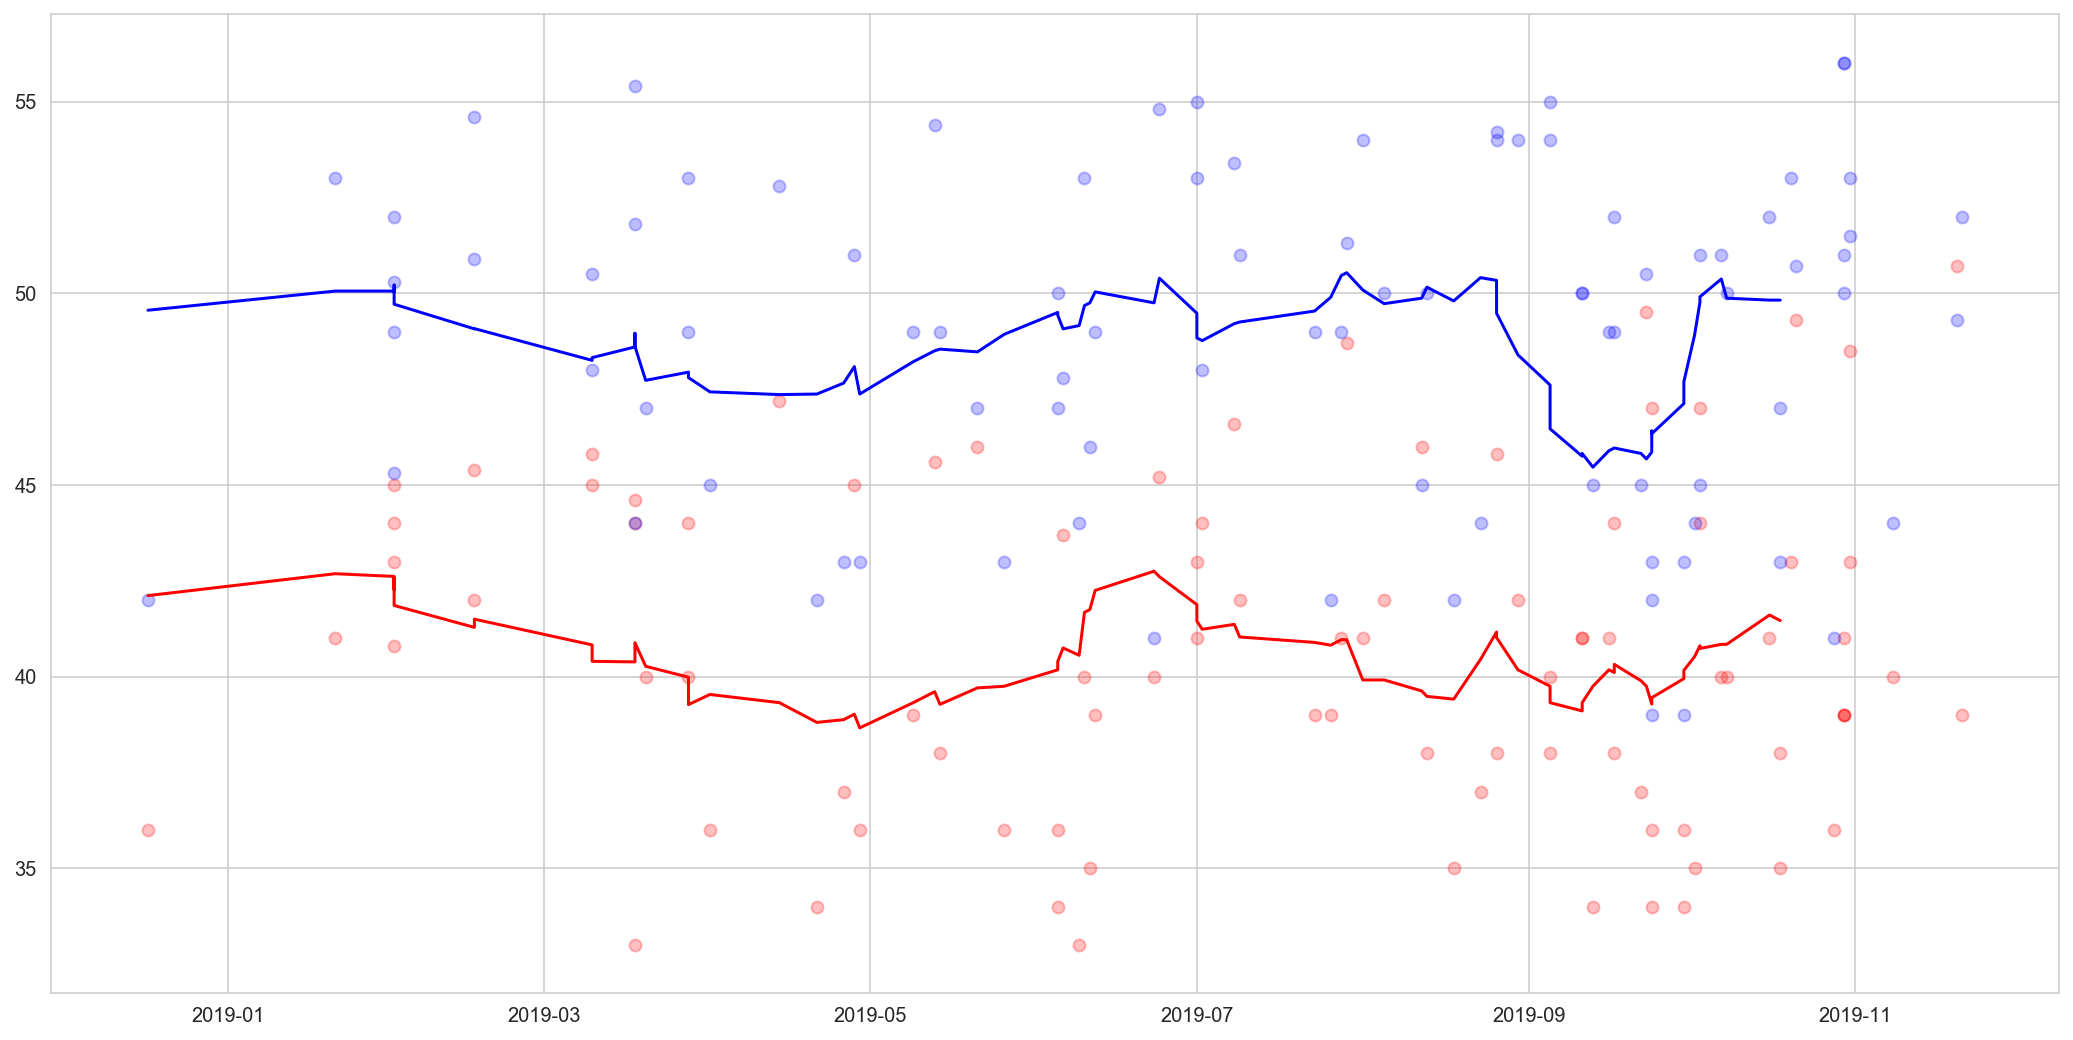

In [11]:
# Plot the 2-week rolling mean for candidate x vs candidate y
plt.figure(figsize=(18, 9))
plt.plot(biden_trump["end_date"], biden_trump["pct_x"].rolling(14).mean(), color = "red")
plt.plot(biden_trump["end_date"], biden_trump["pct_y"].rolling(14).mean(), color = "blue")
plt.scatter(biden_trump["end_date"], biden_trump["pct_x"], c = "red", alpha = .25)
plt.scatter(biden_trump["end_date"], biden_trump["pct_y"], c = "blue", alpha = .25);

# Find MAP Values

### Create Distribution Variables

In [12]:
# Create list of percentages for plotting x-axes
p_for_plotting_x_axis = np.linspace(0, 1, 10001)

In [13]:
# Adapted from Riley Dallas: GA lecture 10.05
def likelihood_fn(n_trials, n_successes, p):
    distn = stats.binom(n_trials, p)
    return distn.pmf(n_successes)

### Get MAP for current state of the polls

In [14]:
def candidate_MAP(df, cand = "x"):
    # Create uninformed prior distribution
    alpha_prior = 2
    beta_prior = 2

    prior_distn = stats.beta(alpha_prior, beta_prior)

    MAP_vals = []
    # Loop through each row and update the prior distribution
    for i, poll in enumerate(df.sort_values("end_date")["votes_y"]):

        # List of percentages
        p_for_plotting_x_axis = np.linspace(0, 1, 1001)
        candidate = int(sum(df[f"votes_{cand}"][:i]))
        total_votes = sum(df["sample_size"][:i])

        # Likelihoods for each percentage
        likelihoods = [likelihood_fn(total_votes, candidate, p) for p in p_for_plotting_x_axis]

        # Create alpha and beta posteriors
        alpha_posterior = candidate + alpha_prior
        beta_posterior = total_votes - candidate + beta_prior

        # Calculate Maximum A Posteriori: Mode of the Posterior Distribution
        MAP_val = (alpha_posterior - 1) / (alpha_posterior + beta_posterior - 2)

        MAP_vals.append(MAP_val)

        # Set prior distribution to be new posterior distribution
        alpha_prior = alpha_posterior
        beta_prior = beta_posterior
    
    return MAP_vals

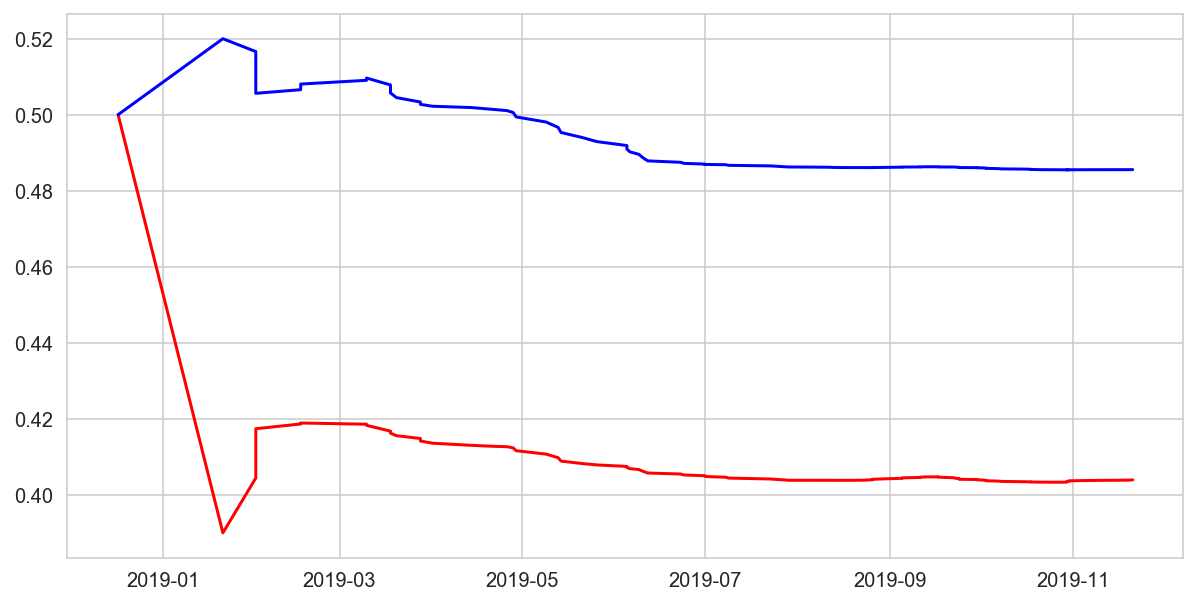

In [15]:
# Plot MAP as it evolves over the past year
plt.figure(figsize = (10, 5))
plt.plot(biden_trump.sort_values("end_date")["end_date"], candidate_MAP(biden_trump, cand = "x"), c = "red")
plt.plot(biden_trump.sort_values("end_date")["end_date"], candidate_MAP(biden_trump, cand = "y"), c = "blue");